<a href="https://colab.research.google.com/github/sandeepsuresh6023/Machine-Learning/blob/master/MOH_covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import copy

In [23]:
population_data = '/content/drive/My Drive/MOH/Population_Data.xls'
analyst_data = '/content/drive/My Drive/MOH/Analyst_Lab_Data.xls'

In [24]:
population_data_df = pd.read_excel(population_data)
analyst_data_df = pd.read_excel(analyst_data)

In [25]:
analyst_data_df.drop('SA22018_V1_00_NAME', axis=1, inplace=True)
analyst_data_df.drop('TA2018_V1_00_NAME', axis=1, inplace=True)
analyst_data_df.set_index('SA22018_V1_00', inplace=True)
analyst_data_df.sort_index(ascending=True, inplace=True)
#analyst_data_df = analyst_data_df[analyst_data_df.Ethnicity != 'Unknown']
analyst_data_df

,Ethnicity,SA2_average_NZDep2018_score,SA2_average_NZDep2018,Number_of_Tests
SA22018_V1_00,,,,
100100,Maori,1134,10,849
100100,Unknown,1134,10,137
100100,Pacific,1134,10,528
100100,Other,1134,10,543
100200,Maori,1105,9,493
...,...,...,...,...
363300,Asian,1056,8,210
363300,Maori,1056,8,634
363300,Other,1056,8,742


In [26]:
population_data_df.set_index('SA22018_V1_00_NAME', inplace=True)
population_data_df.sort_index(ascending=True, inplace=True)
population_data_df

,Ethnicity,Census_2019_Population_Estimate
SA22018_V1_00_NAME,,
100100,Asian,17.258065
100100,Maori,784.009217
100100,Other,732.235023
100100,Pacific,71.497696
100200,Asian,37.555874
...,...,...
363100,Pacific,10.572687
363300,Asian,15.665006
363300,Maori,640.027397


In [27]:
population_index = np.unique(population_data_df.index).tolist()
analyst_index = np.unique(analyst_data_df.index).tolist()
new_index = list(set(population_index).intersection(set(analyst_index)))

In [28]:
df = pd.DataFrame(columns=['SA22018_V1_00', 'Number_of_Tests', 'Population_Estimate', 'SA2_average_NZDep2018', 'Tests_per_Population'])
df['SA22018_V1_00'] = new_index
df.set_index('SA22018_V1_00', inplace=True)
df.sort_index(ascending=True, inplace=True)
for i in new_index:
  df.at[i, 'Number_of_Tests'] = analyst_data_df.loc[i, 'Number_of_Tests'].sum()
  df.at[i, 'Population_Estimate'] = population_data_df.loc[i, 'Census_2019_Population_Estimate'].sum()
  df.at[i, 'SA2_average_NZDep2018'] = int(np.mean(analyst_data_df.loc[i, 'SA2_average_NZDep2018']))
for i in new_index:
  df.at[i, 'Tests_per_Population'] = df.at[i, 'Number_of_Tests']/df.at[i, 'Population_Estimate']
df

,Number_of_Tests,Population_Estimate,SA2_average_NZDep2018,Tests_per_Population
SA22018_V1_00,,,,
100100,2057,1605,10,1.28162
100200,1768,2313,9,0.764375
100400,2968,1248,8,2.37821
100500,4456,1134,9,3.92945
100600,1154,1230,9,0.938211
...,...,...,...,...
362800,2965,1284,9,2.30919
362900,2870,2229,8,1.28757
363000,2830,1500,9,1.88667


In [29]:
df_test = copy.deepcopy(df)
df_test.set_index('SA2_average_NZDep2018', inplace=True)
df_test.sort_index(ascending=True, inplace=True)
df_test_index = np.unique(df_test.index).tolist()
df_deprivation = pd.DataFrame(columns=['SA2_average_NZDep2018', 'Tests_per_1000'])
df_deprivation['SA2_average_NZDep2018'] = df_test_index
df_deprivation.set_index('SA2_average_NZDep2018', inplace=True)
for i in df_test_index:
  df_deprivation.at[i, 'Tests_per_1000'] = np.mean(df_test.loc[i, 'Tests_per_Population']) * 1000
df_deprivation

,Tests_per_1000
SA2_average_NZDep2018,
1,1438.95
2,1391.25
3,1388.88
4,1244.08
5,1484.09
6,1789.45
7,1667.79
8,1987.32
9,2147.6


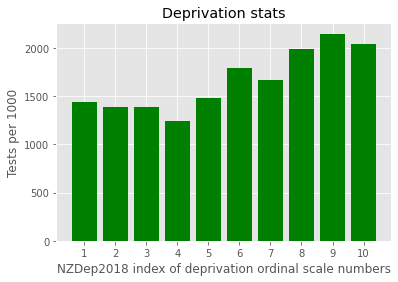

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

y = df_deprivation['Tests_per_1000'].tolist()
x = df_deprivation.index.tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("NZDep2018 index of deprivation ordinal scale numbers")
plt.ylabel("Tests per 1000")
plt.title("Deprivation stats")

plt.xticks(x_pos, x)

plt.show()

In [31]:
df_next = pd.DataFrame(columns=['Ethnicity', 'SA2_average_NZDep2018_score', 'SA2_average_NZDep2018', 'Number_of_Tests'])
df_next2 = pd.DataFrame(columns=['Ethnicity', 'Census_2019_Population_Estimate'])
pop_index = population_data_df.index.tolist()
#analyst_data_df2 = analyst_data_df[analyst_data_df.Ethnicity != 'Unknown']
analyst_data_df2 = copy.deepcopy(analyst_data_df)
analyst2_index = analyst_data_df2.index.tolist()
created_index = list(set(pop_index).intersection(set(analyst2_index)))
for i in sorted(created_index):
  df_temp = analyst_data_df2[analyst_data_df2.index == i]
  df_next = pd.concat([df_next, df_temp])
analyst_data_df2 = copy.deepcopy(df_next)
for i in sorted(created_index):
  df_temp = population_data_df[population_data_df.index == i]
  df_next2 = pd.concat([df_next2, df_temp])
population_data_df2 = copy.deepcopy(df_next2)
analyst_data_df2

,Ethnicity,SA2_average_NZDep2018_score,SA2_average_NZDep2018,Number_of_Tests
100100,Maori,1134,10,849
100100,Unknown,1134,10,137
100100,Pacific,1134,10,528
100100,Other,1134,10,543
100200,Maori,1105,9,493
...,...,...,...,...
363300,Asian,1056,8,210
363300,Maori,1056,8,634
363300,Other,1056,8,742
363300,Unknown,1056,8,345


In [32]:
population_data_asian_df = population_data_df2[population_data_df2.Ethnicity == 'Asian']
asian_total_population = population_data_asian_df['Census_2019_Population_Estimate'].sum()
analyst_data_asian_df = analyst_data_df2[analyst_data_df2.Ethnicity == 'Asian']
asian_total_tests = analyst_data_asian_df['Number_of_Tests'].sum()
(asian_total_tests/asian_total_population) * 1000

1755.580142617363

In [33]:
population_data_maori_df = population_data_df2[population_data_df2.Ethnicity == 'Maori']
maori_total_population = population_data_maori_df['Census_2019_Population_Estimate'].sum()
analyst_data_maori_df = analyst_data_df2[analyst_data_df2.Ethnicity == 'Maori']
maori_total_tests = analyst_data_maori_df['Number_of_Tests'].sum()
(maori_total_tests/maori_total_population) * 1000

1500.433072810388

In [34]:
population_data_pacific_df = population_data_df2[population_data_df2.Ethnicity == 'Pacific']
pacific_total_population = population_data_pacific_df['Census_2019_Population_Estimate'].sum()
analyst_data_pacific_df = analyst_data_df2[analyst_data_df2.Ethnicity == 'Pacific']
pacific_total_tests = analyst_data_pacific_df['Number_of_Tests'].sum()
(pacific_total_tests/pacific_total_population) * 1000

3322.5770463516537

In [35]:
population_data_other_df = population_data_df2[population_data_df2.Ethnicity == 'Other']
other_total_population = population_data_other_df['Census_2019_Population_Estimate'].sum()
analyst_data_other_df = analyst_data_df2[analyst_data_df2.Ethnicity == 'Other']
analyst_data_unknown_df = analyst_data_df2[analyst_data_df2.Ethnicity == 'Unknown']
other_total_tests = analyst_data_other_df['Number_of_Tests'].sum() + analyst_data_unknown_df['Number_of_Tests'].sum()
(other_total_tests/other_total_population) * 1000

673.858264121817

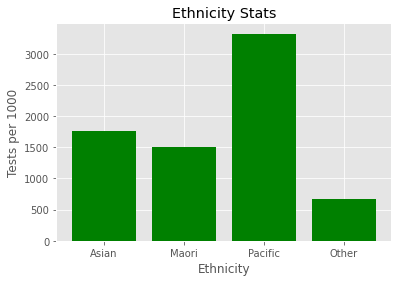

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

y = [1755.58, 1500.433, 3322.577, 673.858]
x = ['Asian', 'Maori', 'Pacific', 'Other']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Ethnicity")
plt.ylabel("Tests per 1000")
plt.title("Ethnicity Stats")

plt.xticks(x_pos, x)

plt.show()